In [ ]:
# Dataset : http://cb.lk/covid_19
 
#!wget http://cb.lk/covid_19

In [1]:
from google.colab import drive

drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [2]:
#(covid + normal)
!unzip /content/gdrive/MyDrive/CovidDataset.zip

Archive:  /content/gdrive/MyDrive/CovidDataset.zip
   creating: CovidDataset/Train/
   creating: CovidDataset/Train/Covid/
  inflating: CovidDataset/Train/Covid/01E392EE-69F9-4E33-BFCE-E5C968654078.jpeg  
  inflating: CovidDataset/Train/Covid/03BF7561-A9BA-4C3C-B8A0-D3E585F73F3C.jpeg  
  inflating: CovidDataset/Train/Covid/1.CXRCTThoraximagesofCOVID-19fromSingapore.pdf-000-fig1a.png  
  inflating: CovidDataset/Train/Covid/1.CXRCTThoraximagesofCOVID-19fromSingapore.pdf-000-fig1b.png  
  inflating: CovidDataset/Train/Covid/1.CXRCTThoraximagesofCOVID-19fromSingapore.pdf-001-fig2a.png  
  inflating: CovidDataset/Train/Covid/1.CXRCTThoraximagesofCOVID-19fromSingapore.pdf-001-fig2b.png  
  inflating: CovidDataset/Train/Covid/1.CXRCTThoraximagesofCOVID-19fromSingapore.pdf-002-fig3a.png  
  inflating: CovidDataset/Train/Covid/1.CXRCTThoraximagesofCOVID-19fromSingapore.pdf-002-fig3b.png  
  inflating: CovidDataset/Train/Covid/1.CXRCTThoraximagesofCOVID-19fromSingapore.pdf-003-fig4a.png  
  infl

In [3]:
TRAIN_PATH = "CovidDataset/Train"
VAL_PATH = "CovidDataset/Test"



In [4]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.layers import *
from keras.models import * 
from keras.preprocessing import image

In [5]:

# CNN Based Model in Keras

model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(224,224,3)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss=keras.losses.binary_crossentropy,optimizer='adam',metrics=['accuracy'])

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 32)      896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 220, 220, 64)      18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 64)      0         
_________________________________________________________________
dropout (Dropout)            (None, 110, 110, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 108, 108, 64)      36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 54, 54, 64)        0

In [7]:
# Train from scratch
train_datagen = image.ImageDataGenerator(
    rescale = 1./255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
)

test_dataset = image.ImageDataGenerator(rescale=1./255)

In [8]:
train_generator = train_datagen.flow_from_directory(
    '/content/CovidDataset/Train',
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'binary')


Found 364 images belonging to 2 classes.


In [9]:
train_generator.class_indices

{'Covid': 0, 'Normal': 1}

In [10]:
validation_generator = test_dataset.flow_from_directory(
    '/content/CovidDataset/Val',
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'binary')

Found 60 images belonging to 2 classes.


In [11]:
hist = model.fit_generator(
    train_generator,
    steps_per_epoch=8,
    epochs = 10,
    validation_data = validation_generator,
    validation_steps=2
)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
8/8 [==============================] - 46s 2s/step - loss: 2.3948 - accuracy: 0.5006 - val_loss: 0.6924 - val_accuracy: 0.5000
Epoch 2/10
8/8 [==============================] - 10s 1s/step - loss: 0.6816 - accuracy: 0.5484 - val_loss: 0.6914 - val_accuracy: 0.7167
Epoch 3/10
8/8 [==============================] - 10s 1s/step - loss: 0.6822 - accuracy: 0.5347 - val_loss: 0.6896 - val_accuracy: 0.5000
Epoch 4/10
8/8 [==============================] - 10s 1s/step - loss: 0.6822 - accuracy: 0.5284 - val_loss: 0.6742 - val_accuracy: 0.5000
Epoch 5/10
8/8 [==============================] - 9s 1s/step - loss: 0.6600 - accuracy: 0.5985 - val_loss: 0.6414 - val_accuracy: 0.5000
Epoch 6/10
8/8 [==============================] - 10s 1s/step - loss: 0.6638 - accuracy: 0.6228 - val_loss: 0.6328 - val_accuracy: 0.7833
Epoch 7/10
8/8 [==============================] - 10s 1s/step - loss: 0.5891 - accuracy: 0.7103 - val_loss: 0.5082 - val_accuracy: 0.8833
Epoch 8/10
8/8 [===================

In [12]:
model.save("modeln.h5")

In [13]:
model.evaluate_generator(train_generator)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1877: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


[0.5106849074363708, 0.7664835453033447]

In [14]:
model.evaluate_generator(validation_generator)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1877: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


[0.4338966906070709, 0.8333333134651184]

In [15]:
model=load_model("modeln.h5")

In [16]:


import os


In [17]:
train_generator.class_indices

{'Covid': 0, 'Normal': 1}

In [18]:

y_actual=[]
y_test=[]

In [19]:
for i in os.listdir("./CovidDataset/Val/Normal/"):
  img=image.load_img("./CovidDataset/Val/Normal/"+i,target_size=(224,224))
  img=image.img_to_array(img)
  img=np.expand_dims(img,axis=0)
  p=model.predict_classes(img)
  y_test.append(p[0,0])
  y_actual.append(1)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [20]:
for i in os.listdir("./CovidDataset/Val/Covid/"):
  img=image.load_img("./CovidDataset/Val/Covid/"+i,target_size=(224,224))
  img=image.img_to_array(img)
  img=np.expand_dims(img,axis=0)
  p=model.predict_classes(img)
  y_test.append(p[0,0])
  y_actual.append(0)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [21]:
y_actual=np.array(y_actual)
y_test=np.array(y_test)

In [22]:
from sklearn.metrics import confusion_matrix

In [23]:
cm=confusion_matrix(y_actual,y_test)

In [24]:
!pip install seaborn

In [25]:
import seaborn as sns

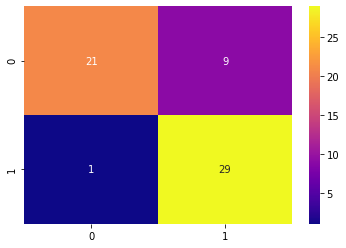

In [26]:
sns.heatmap(cm,cmap="plasma",annot=True)